# HAC

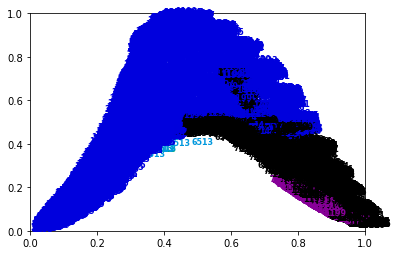

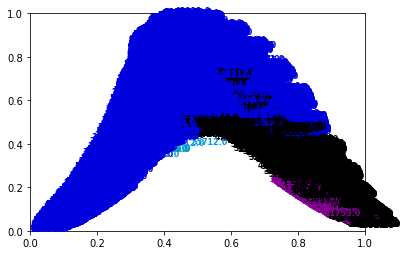

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import sklearn

# Normalizador de información mutua
from sklearn.metrics import normalized_mutual_info_score as NMI
# Normalizador
from sklearn.preprocessing import StandardScaler as SS
# Dimensionador
from sklearn.decomposition import PCA 
# Gestionador HAC 
from sklearn.cluster import AgglomerativeClustering 

# Parametros
CSV_PATH = 'datos_prueba/prueba20.000.csv'
CLUSTERS = 5
MAX_IT = 10

# Se obtienen los datos del archivo
dataset = pd.read_csv(CSV_PATH)

# Se filtra el dataset por valores numéricos sin contar brewery_time
data = pd.DataFrame({'review_overall':    dataset['review_overall'],
                        'review_aroma':      dataset['review_aroma'],
                        'review_appearance': dataset['review_appearance'],
                        'review_palate':     dataset['review_palate'],
                        'review_taste':      dataset['review_taste'],
                        'beer_abv':          dataset['beer_abv']})

# Se arregla el dataset asumiendo 0 == vacio - Error: NaN found
data = data.fillna(0)

# Se normalizan los datos y se disminuye la dimención
data = SS().fit_transform(data)
data = PCA(n_components = 2).fit_transform(data)

from sklearn import manifold
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(data)


clustering = AgglomerativeClustering(linkage = 'complete', n_clusters = CLUSTERS, affinity = 'euclidean', connectivity = None)
clustering.fit(data)

y = dataset['brewery_id'] 
x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
X_red = (X_red - x_min)/(x_max - x_min)
for i in range(X_red.shape[0]):
	plt.text(X_red[i,0], X_red[i,1], str(y[i]),
	color=plt.cm.spectral(clustering.labels_[i]/10.),
	fontdict={'weight': 'bold', 'size': 8})

plt.show()

y = dataset['beer_beerid'] #caso etiqueta id de la cerveza
x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
X_red = (X_red - x_min)/(x_max - x_min)
for i in range(X_red.shape[0]):
	plt.text(X_red[i,0], X_red[i,1], str(y[i]),
	color=plt.cm.spectral(clustering.labels_[i]/10.),
	fontdict={'weight': 'bold', 'size': 8})

plt.show()


## Analisis


